In [2]:
%load_ext autoreload
%autoreload 2

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statistics
from pathlib import Path
import py.NEBTools as nt
from operator import itemgetter


pairspath="/home/agoga/documents/code/topcon-md/data/neb/FullSet/"
nebfolder="/home/agoga/documents/code/topcon-md/neb-out/"


group=["FullSet/"] #"farm/6169019/","farm/6169020/","farm/6169021/","farm/6169022/"]#
#group=["farm/perpPairs/","farm/parallelPairs/"]

multiplot=[]
clean=False #do this very rarely when you get lots of new data from farm

for g in group:
    
    gpath=nebfolder+g
   
    print(gpath)
    
    
    if clean:
        cleanlist=[] 
        subfolders="farm-folders/"
        print(f"Cleaning the {g+subfolders} directory, this may take a while.")
        for d in Path(gpath+subfolders).rglob('**/*.csv'):
            cleanlist.append(str(d))        
        cleandf=nt.clean_csvs(cleanlist,gpath)
        
        nt.clean_pairfiles(cleandf,pairspath)
    else:
        csvlist=[]
        i=0
        for d in Path(gpath).glob('*.csv'):
            csvlist.append(str(d))
            # if i >1:
            #     break
            # i+=1
            

        #print(csvlist[0])
        setdf=nt.csvs_to_df(csvlist)

/home/agoga/documents/code/topcon-md/neb-out/FullSet/


In [6]:
#nt.plot_multi_distribution(setdf,"FEB")
#nt.plot_vz_df(setdf)
# comboH=nt.df_combine_H(setdf)

#nt.sparse_graph(setdf)

#rdf=nt.plot_rangehist(setdf,[6,9,12,15],'O',skip=False)
ndf=setdf[setdf["csvname"]!="1.6-1.csv"]

nt.plot_pair_angle(setdf,"FEB") 
 
#setdf=nt.csvs_to_df(csvlist)   

#rangeddf =nt.check_si_O_bonds(setdf,"FEB")



# ratios=df["ratio"].unique()

# for r in ratios:

#     hnum=df[df["ratio"]==r]['Hnum'].tolist()
# #.plot(kind='scatter', x="Hnum",y='mean')
#     mean=df[df["ratio"]==r]['mean'].tolist()
#     plt.scatter(hnum,mean,)   
# plt.show()

angle_between_pts_df done with 1.7-378.csv


KeyboardInterrupt: 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


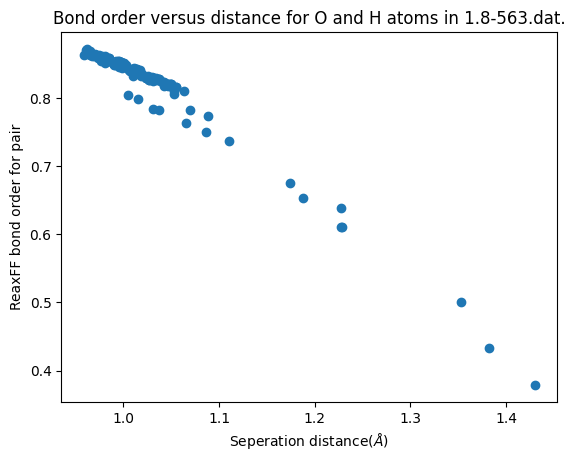

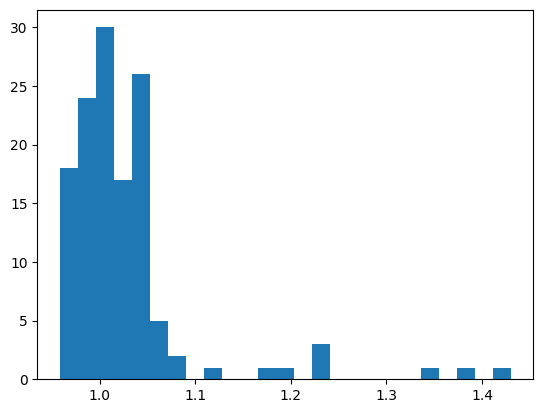

In [15]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas
import numpy as np
import py.NEBTools as nt

datapath="/home/agoga/documents/code/topcon-md/data/neb/"
dfile ="1.8-563.dat"
filename=dfile.removesuffix('.dat').removesuffix('.data').removesuffix('.dump')
bondfile=filename+".bonds"

(atoms,simbox) = nt.read_file_data_bonds(datapath,dfile)
midz=5
zext=(simbox[2,1]-simbox[2,0])

type1='O'
type2='H'

t1atoms=atoms[atoms['type']==type1]


distlist=[]
bolist=[]
obolist=[]
zlist=[]

for i, row in t1atoms.iterrows():
        curpos=row['pos']
        curz=curpos[2]
        nindices = row['bonds']
        t2n=[]
        allt1neigh=[]
        
        for ni in nindices:
            n=ni[0]
            allt1neigh.append(n)
            bo=ni[1]
            
            neitype=atoms.at[n,'type']
            neipos=atoms.at[n,'pos']
            nz=neipos[2]
            if neitype ==type2:
                t2n.append(n)
                
                dist=nt.pbc_dist(simbox,curpos,neipos)
                
                
                if (curz > midz and nz < midz):
                    nz+=zext
                if (curz < midz and nz > midz):
                    curz+=zext
                avgz=(curz+nz)/2
                
                distlist.append(dist)
                zlist.append(avgz)
                bolist.append(bo)
                
                # if dist > 2:
                #     print(f"ParticleIdentifier=={i}||ParticleIdentifier=={n}")
            
            
        # for nei in t2n:
        #     neibonds = atoms.at[nei,'bonds']
            
        #     for neib in neibonds:
        #         nei=neib[0]
        #         neibo=neib[1]
        #         neineitype = atoms.at[nei,"type"]
                
        #         if neineitype ==type1:
        #             for ni in nindices:
        #                 if nei == ni[0]:
        #                     obolist.append(nei[1])
                        

fig, ax = plt.subplots()
plt.title(f'Bond order versus distance for {type1} and {type2} atoms in {dfile}.')
plt.ylabel("ReaxFF bond order for pair")
plt.xlabel(r'Seperation distance($\AA$)')
ax.scatter(distlist,bolist)
# ax.set_ylim(0.7)
plt.show()

# fig, ax = plt.subplots()
# plt.title(f'Seperation distance versus average z for pairs on {type1} and {type2} in {dfile}.')
# ax.scatter(zlist,distlist)
# plt.ylabel(r'Seperation distance($\AA$)')
# plt.xlabel(r'Average z coordinate of a pair of atoms($\AA$)')
# plt.show()


# ax.scatter(zlist,distlist)

plt.hist(distlist,25)
plt.show()

                
                
                

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import py.NEBTools as nt
from IPython.display import display, HTML


datapath="/home/agoga/documents/code/topcon-md/data/neb/"
dfile ="1.8-563.dat"
filename=dfile.removesuffix('.dat').removesuffix('.data').removesuffix('.dump')

(atoms,simbox) = nt.read_file_data_bonds(datapath,dfile)
close=nt.atoms_in_radius(atoms,simbox,1,5)
print(close.to_string())


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
     type         q          x          y          z                                                            pos nb                                                                     bonds      dist
id                                                                                                                                                                                                        
2      Si -0.079973   2.491411   2.240447   0.603007   [2.4914107933193943, 2.2404467671012775, 0.6030071848072305]  5          [[1, 0.817], [92, 0.538], [93, 0.804], [101, 0.951], [6, 0.817]]  2.241848
3      Si -0.009975   2.318436   5.032381   2.969141    [2.3184357294506466, 5.032381286714575, 2.9691414432495087]  4                        [[4, 0.757], [6, 0.793], [13, 0.774], [20, 0.773]]  4.429566
5      Si  0.020546   5.109902   2.345737   3.047204     [5.109902446990848, 2.3457371712643083, 3.0